# Project: Investigate a dataset(TMDB movie dataset)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul> <li><a href="#cleaning">Data Cleaning</a></li></ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
For the data analysis project,I have investigated this TMDB movie dataset which is a cleaned version of original 
source on kaggle which can be found [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import plotly.offline as offline
import plotly.graph_objs as go
import squarify
#using the read_csv function to read the csv file and storing it into variable for later analysis
df=pd.read_csv('./tmdb-5000-movie-dataset/tmdb-movies.csv')

### What Questions can be answered witht this dataset?

 1. Which movie has the highest and lowest budget?
 
 2. Which are the top 10 expensive movies ever made?
 3. Which movie has the highest and lowest boxoffice collection?
 4. Which are top 10 movies with highest box-office collection ever?
 5. Which movie had the best and worst net profit?
 6. Which are the top 10 movies in terms of net profit earned?
 7. Which movie had the Longest and shortest runtime?
 8. What are the average runtimes of movies over the years?
 9. What is range of movie runtime that is most like by the audience?
 10. What is the profit trend of the movies over the years?
 11. Which genre of movies were made the most over the years?
 12. Which directors made most number of movies?
 13. Which Actor or Actress has worked in the most movies?
 14. Which production comapnies has made most movies?
 15. In which genre most successful movies were made?
 16. Which director has made the most number of successful movies?
 17. Which actor had produced more number of successful movies?
 18. Which production companie has made the more number of successful movies?
 19. What is the average runtime of successful movies and its distribution?
 20. What are some descriptive statistic regarding high revenue or successful movies?

<a id='wrangling'></a>
## Data Wrangling
Here we will observe our dataset and we'll get an deeper insight on our data.Based on the insights we will modify the rows and columns of the dataset which will make it more accurate and easy for the exploratory analysis.

In [2]:
#info function will give us a concise summary of our dataset which will be related to rows and columns and its dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
#viewing first 4 columns of dataest to see what kind of values and in each column and how dataset looks like
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# checking on how many rows and columns are there in total in this dataset
df.shape

(10866, 21)

## Inferences
* There are **10866 rows** and **21 columns** which means the dataset contains data of over 10k+ movies.
* **There is no specific way of measure is defined for budget and revenue column so we will assume it in terms of US $.**
* ** For runtime we will assume the given value are in terms of minutes**
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
* Here we can see that there are some columns which have non-null values such as budget,director etc.?

## Data that needs to be cleaned
* There are many columns which are unnecessary or are not needed during the analysis of the data. Those columns are: id,imdb_id,budget_adj,revenue_adj,homepage,keywords,overview,vote_count,vote_average,tagline
* The release_date column dataype is object that is not proper for a datatime column.
* revenue and budget columns datatype is float64 which might make it harder for analysis later not necessary.
* Before analysis we'll have to handle those null values.
* We'll have to check and drop the duplicate rows before analysis

<a id='cleaning'></a>
### Data Cleaning
Based on the inferences drawn while data wrangling,Here we will modify our dataset step by step to make it clean and easy to analyse.

### 1. Remove the unnecessary columns

In [5]:
# using drop function to drop the multiple not required columns
df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average','tagline'],axis=1,inplace=True)

# making sure if the changes have been made
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015


### 2. Handling the Nulls and zeros of the dataset

In [6]:
# replacing the zeros with null values
df[['revenue','budget','runtime']]=df[['revenue','budget','runtime']].replace(0,np.NAN)
# checking for the total null values across each column
df.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
release_year               0
dtype: int64

In [7]:
# using dropna function to drop the null value rows from the dataset
df.dropna(inplace=True)
# checking for any left null values
df.isnull().sum().sum()

0

In [8]:
# checking for the rows and columns left after dropping the ones with NAN
x,y=df.shape
print('After dropping the null value {} rows and {} columns are left'.format(x,y))

After dropping the null value 3806 rows and 11 columns are left


### 3.Drop rows with duplicate values

In [9]:
# duplicated() returns the boolean value for rows with duplicate and non-duplicated value
sum(df.duplicated())

1

In [10]:
# using drop_duplicats() to drop the rows with duplicate values
df.drop_duplicates(inplace=True)
# checking for number of rows left after removing the duplicates
df.shape

(3805, 11)

### 4. Change datatype of 'release_date' column

In [11]:
# to_datetime() function for converting the column datatype to datetime64
df['release_date']=pd.to_datetime(df['release_date']);
#confirming the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 356.7+ KB


### 5. Create new column 'net_profit'

In [12]:
# net_profit gives the profit made by a movie which is the difference between revenue or money earned and budget or money spent 
df['net_profit']=df['revenue']-df['budget']
# verifying the change
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,net_profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09


### 6. Change the datatype of revenue,budget and net_profit columns

In [13]:
# converting the datatype of these 3 columns to int as it is more suitable and convinient
df[['revenue','budget','net_profit']]=df[['revenue','budget','net_profit']].astype(int)
# check
df[['revenue','budget','net_profit']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 3 columns):
revenue       3805 non-null int64
budget        3805 non-null int64
net_profit    3805 non-null int64
dtypes: int64(3)
memory usage: 118.9 KB


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which movie has the highest and lowest budget?

In [14]:
# using idxmax and idxmin function to obtain the row number of max and min value for budget
max_budget_loc,min_budget_loc=df['budget'].idxmax(),df['budget'].idxmin()
# pd.concat() Concatenate pandas objects along a particular axis with optional set logic along the other axes.
pd.concat([df.loc[max_budget_loc],df.loc[min_budget_loc]],axis=1)

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


* Here column 2244 and 2618 gives us info regarding movies with highest and lowest budget respectively.
* From the above table we can say that **The Warrior's Way** is the movie with highest budget with a total budget 425M \\$ and was released in 2010 with a total runtime of 100 mintues.
* Lost & Found has the lowest budget ever which is just 1\\$ and revenue of just 100\\$.


### 2.Which are the top 10 expensive movies ever made?

         budget                               original_title
2244  425000000                            The Warrior's Way
3375  380000000  Pirates of the Caribbean: On Stranger Tides
7387  300000000     Pirates of the Caribbean: At World's End
14    280000000                      Avengers: Age of Ultron
6570  270000000                             Superman Returns
1929  260000000                                      Tangled
4411  260000000                                  John Carter
7394  258000000                                 Spider-Man 3
5508  255000000                              The Lone Ranger
643   250000000                   X-Men: Days of Future Past


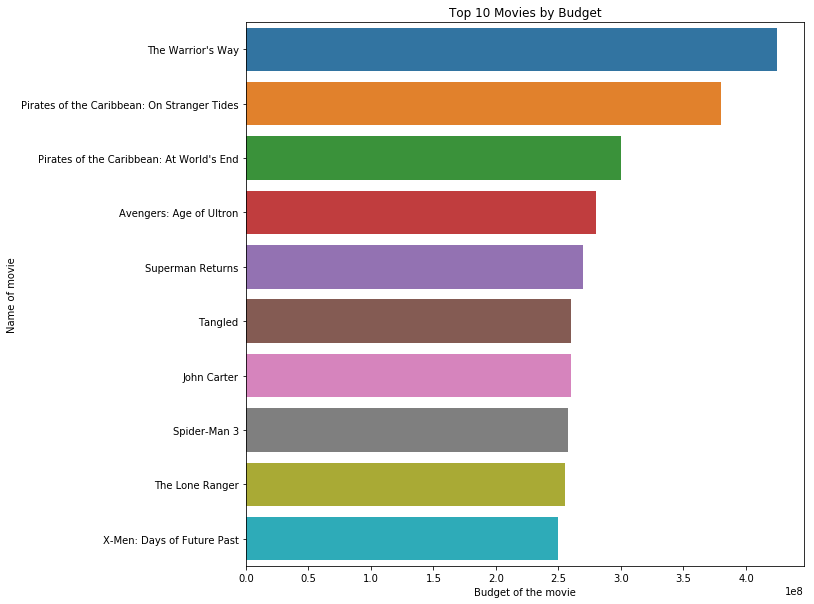

In [15]:
# assigning the figure size of plot
plt.figure(figsize=(10,10))
# creating a new data frame with only budget and original_title in it.
top_budget=df[['budget','original_title']].sort_values(ascending=False,by='budget')
print(top_budget.head(10))
#storing the first 10 values and plotting a barplot for result.
mod=top_budget[:10]
g=sns.barplot(y="original_title", x="budget", data=mod)
plt.title('Top 10 Movies by Budget')
plt.xlabel('Budget of the movie')
plt.ylabel('Name of movie')
plt.show();

### 3. Which movie has the highest and lowest boxoffice collection?

In [16]:
# using idxmax and idxmin function to obtain the row number of max and min value for budget
max_revenue_loc,min_revenue_loc=df['revenue'].idxmax(),df['revenue'].idxmin()
# combining the results together
pd.concat([df.loc[max_revenue_loc],df.loc[min_revenue_loc]],axis=1)

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


* Avatar the movie with a total revenue of nearly 2.7B\\$ is the movie highest box-office collection ever and it had a budget of nearly 237M\\$.
* Shattered Glass with a total revenue of 2\\$ have the worst boxoffice run ever.A total flop or an unlucky run!!

### 4. Which are top 10 movies with highest box-office collection ever?

         revenue                                original_title
1386  2781505847                                        Avatar
3     2068178225                  Star Wars: The Force Awakens
5231  1845034188                                       Titanic
4361  1519557910                                  The Avengers
0     1513528810                                Jurassic World
4     1506249360                                     Furious 7
14    1405035767                       Avengers: Age of Ultron
3374  1327817822  Harry Potter and the Deathly Hallows: Part 2
5422  1274219009                                        Frozen
5425  1215439994                                    Iron Man 3


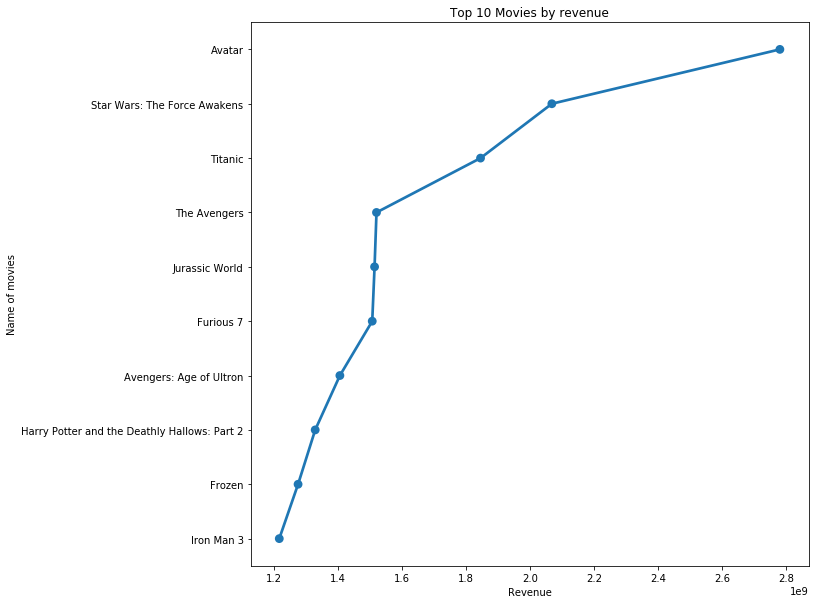

In [17]:
#giving the plot a specific size
plt.figure(figsize=(10,10))
# creating a df which will contain revenue and original_title with ascending values
top_revenue=df[['revenue','original_title']].sort_values(ascending=False,by='revenue')
# top 10 movies in terms of revenue
print(top_revenue.head(10))
mod=top_revenue[:10]
# seaborn plot for movie result and its labelling
sns.pointplot(y='original_title',x='revenue',data=mod);
plt.title('Top 10 Movies by revenue')
plt.xlabel('Revenue')
plt.ylabel('Name of movies');

### 5. Which movie had the best and worst net profit?

In [18]:
#getting column number for movie with max and min profit
max_net_profit_loc,min_net_profit_loc=df['net_profit'].idxmax(),df['net_profit'].idxmin()
#displaying them toghether
pd.concat([df.loc[max_net_profit_loc],df.loc[min_net_profit_loc]],axis=1)

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


* Avatar is not only the movie with highest revenue ever but also have the best net profit earned with a total profit of 2.5B\\$
* Seems like The Warrior's Way had a tough luck,inspite being the movie with the higest budget(425M\\$) it's the worst performing movie ever with a total loss 413M\\$


### 6. Which are the top 10 movies in terms of net profit earned?

      net_profit                                original_title
1386  2544505847                                        Avatar
3     1868178225                  Star Wars: The Force Awakens
5231  1645034188                                       Titanic
0     1363528810                                Jurassic World
4     1316249360                                     Furious 7
4361  1299557910                                  The Avengers
3374  1202817822  Harry Potter and the Deathly Hallows: Part 2
14    1125035767                       Avengers: Age of Ultron
5422  1124219009                                        Frozen
8094  1084279658                                       The Net


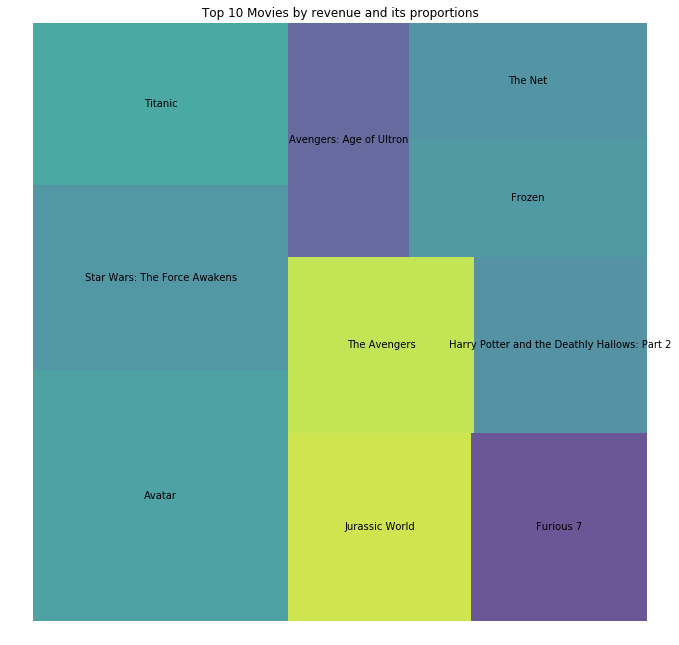

In [19]:
#size of plot
plt.figure(figsize=(11,11))
# creating a df which will contain profit and name of movies in ascending order by profit
top_net_profit=df[['net_profit','original_title']].sort_values(ascending=False,by='net_profit')
print(top_net_profit.head(10))
mod=top_net_profit[:10]
# using treemap to plot the proportions of each top movies by their profit and then labelling it
# https://python-graph-gallery.com/200-basic-treemap-with-python/ about basing treeplot
squarify.plot(sizes=mod['net_profit'],label=mod['original_title'], alpha=.8 )
plt.axis('off')
plt.title('Top 10 Movies by revenue and its proportions',fontsize=12)
plt.show()

### 7. Which movie had the Longest and shortest runtime?

In [20]:
#Getting columns number for movies with shortest and longest runtime
max_runtime_loc,min_runtime_loc=df['runtime'].idxmax(),df['runtime'].idxmin()
#concatenating them
pd.concat([df.loc[max_runtime_loc],df.loc[min_runtime_loc]],axis=1)

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


* Carlos with a runtime of 338 is the movie with longest runtime ever and kid's story being the shortest with 15 minutes of runtime.
* Both movies had a loss or negtaive profit

### 8. What are the average runtimes of movies over the years?

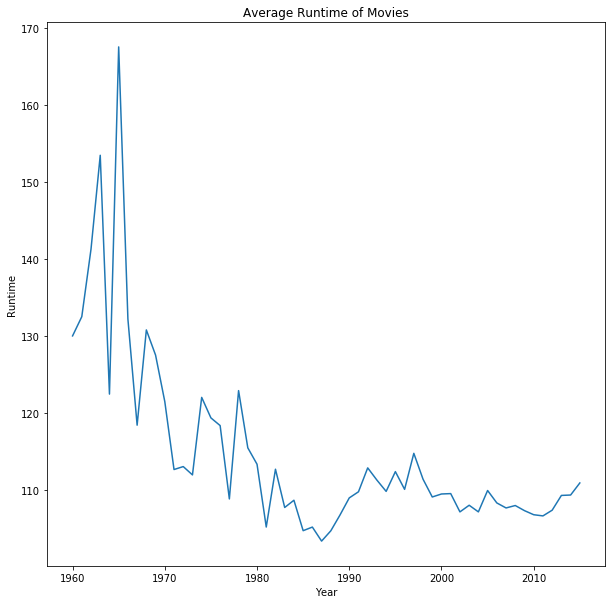

In [21]:
plt.figure(figsize=(10,10))
#grouping data by year of release and getting mean runtime according to years 
df_runtime_avg=df.groupby('release_year')['runtime'].mean()
df_runtime_avg.plot(x='release_year',y='runtime')
plt.title('Average Runtime of Movies')
plt.xlabel('Year')
plt.ylabel('Runtime');

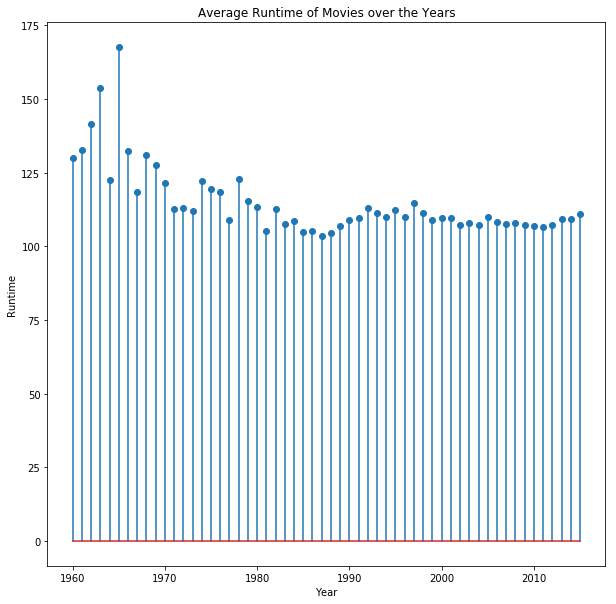

In [22]:
plt.figure(figsize=(10,10))
# creating x axis values for the plot
x=np.arange(1960,2016)
#using runtime of avg each year for y values
values=df_runtime_avg 
# creating a lollipop plot which is hybrid of bar and scatterplot
# https://python-graph-gallery.com/180-basic-lollipop-plot/ 
# defining x and y valuees and then plotting it
plt.stem(x,values)
plt.title('Average Runtime of Movies over the Years')
plt.xlabel('Year')
plt.ylabel('Runtime');

* There has been a decline in runtime of movies over the year.
* As we can see back in 60s the runtime of movies use to be highest.
* Since the 70s there has been a steady decline and nowadays the average runtime is around 100-120 minutes.

Text(0,0.5,'Proportion of number of movie')

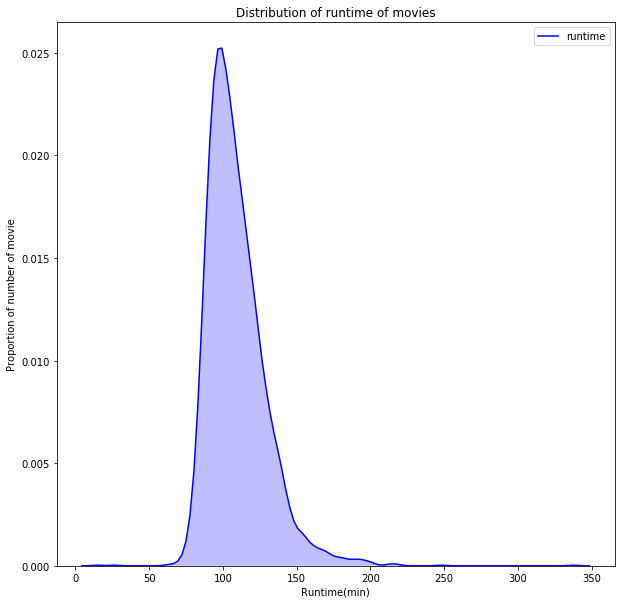

In [23]:
plt.figure(figsize=(10,10))
#creating a density plot to find behaviour in runtime of movies over the past years
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(df['runtime'], color = 'blue',shade=True);
plt.title('Distribution of runtime of movies')
plt.xlabel('Runtime(min)')
plt.ylabel('Proportion of number of movie')

* Most of the movies had a runtime of about 110 minutes

Text(0.5,0,'Runtime(min)')

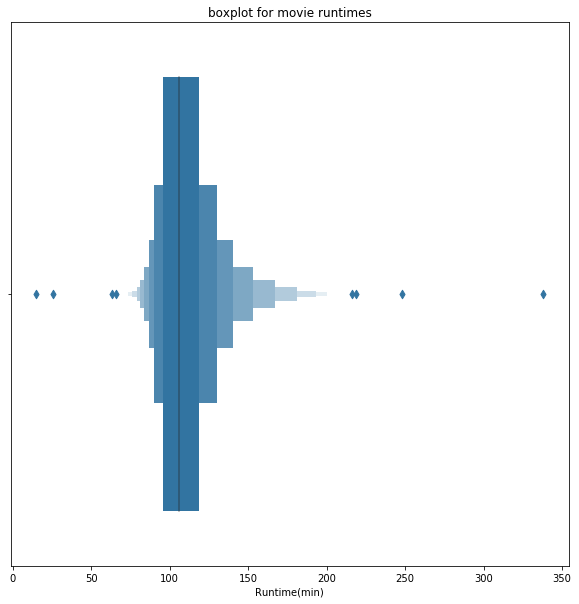

In [24]:
# using boxenplot to plot a enhanced boxplot for larger dataset
# https://seaborn.pydata.org/generated/seaborn.boxenplot.html
plt.figure(figsize=(10,10))
sns.boxenplot(df['runtime']);
plt.title('boxplot for movie runtimes')
plt.xlabel('Runtime(min)')

* Majority of movie tend to last around 100-120 mintues.

* There are some with a runtime as high as 200 or 250 minutes and as low as 15 or 40 minutes

In [25]:
#getting a descriptive statistics of runtime column to confirm our plotting observation
df['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

* Our plotting analysis are same the given descriptive stats.
* Mean runtime of all movies is 109 minutes which is almost 110 minutes
* It also confirm that most of the movies tends to have a runtime of 100-120 minutes.
* There is a movie which had a runtime of 338 minutes.

### 9. What is range of movie runtime that is most like by the audience?

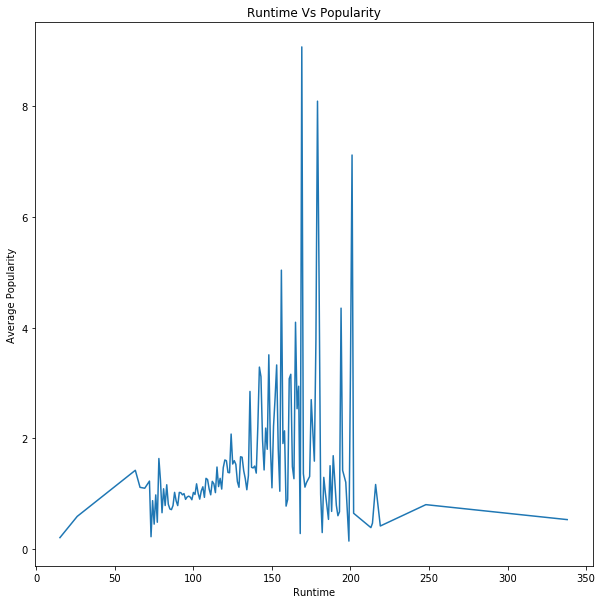

In [26]:
# grouping data according to runtime and then plotting it against the mean popularity of that runtime
df.groupby('runtime')['popularity'].mean().plot(figsize = (10,10))
plt.title("Runtime Vs Popularity")
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')
plt.show();

* We have seen that average runtime of movie is around 110 minutes.
* But movie with higer popularity rating tend to last around 160-200 minutes.
* Maybe people get more involved in longterm movies.

### 10. What is the profit trend of the movies over the years?

In [27]:
# creating a df where a data is grouped by relesa year and have mean profit value per each year
profit_by_year=df.groupby('release_year')['net_profit'].mean()
# descriptive analysis of the new df
profit_by_year.describe()

count    5.600000e+01
mean     5.960354e+07
std      2.275958e+07
min      1.049374e+07
25%      4.363198e+07
50%      5.885283e+07
75%      7.320327e+07
max      1.189509e+08
Name: net_profit, dtype: float64

In 2015 movies made the most profit overall and in 1966 they made the least


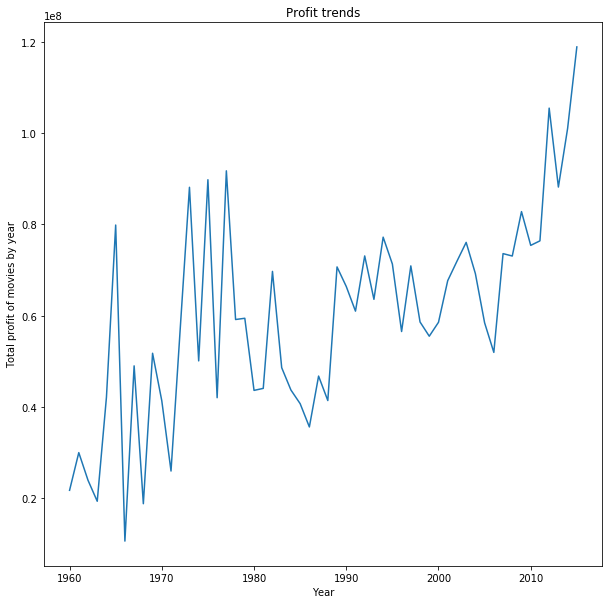

In [28]:
plt.figure(figsize=(10,10))
#plotting the profit trends against the years
profit_by_year.plot()
plt.ylabel('Total profit of movies by year')
plt.xlabel('Year')
plt.title('Profit trends')
print('In {} movies made the most profit overall and in {} they made the least'.format(profit_by_year.idxmax(),profit_by_year.idxmin()))


### 11. Which genre of movies were made the most over the years?

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64


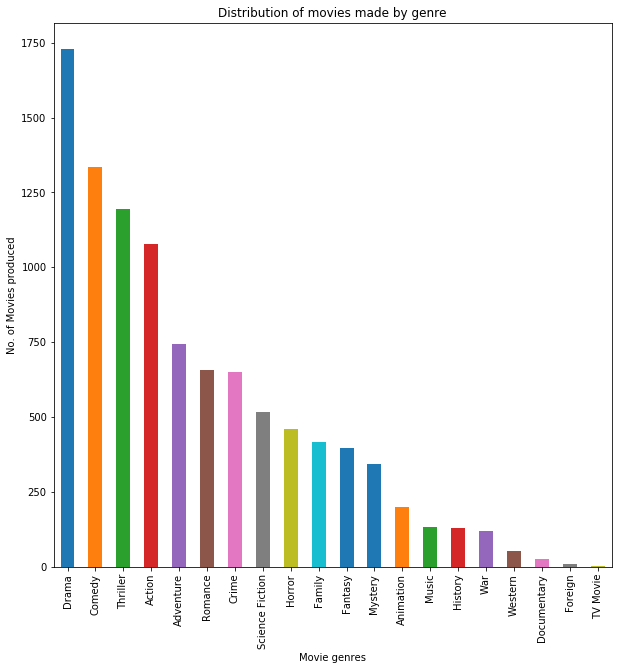

In [29]:
#As we have seen genres columns have multiple values in it.
# splitting the data of genre column  and storing it a list and then running a double for loop to extract each genre separately.
# using value_counts() function to count the number of times a genre occured in it.
#Doing a bar plot for visualization.
plt.figure(figsize=(10,10))
genre_list=df['genres'].str.split('|')
genre=[]
for i in genre_list:
    for j in i:
        genre.append(j)
#using pd.series to convert list into pandas series
df_genre=pd.Series(genre)
print(df_genre.value_counts())
df_genre.value_counts().plot(kind='bar');
plt.xlabel('Movie genres')
plt.ylabel('No. of Movies produced')
plt.title('Distribution of movies made by genre')
plt.show();

* Drama comes on top with a total count of 1729.
* Drama,comedy,Thriller and Action are those genres on which over 1000 movies were made.
* Tv Movie and Foreign genres on which less 10 movies were made with Tv Movie genre being the least

### 12. Which directors made most number of movies?

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
dtype: int64


Text(0.5,1,'Movies made by top directors distribution')

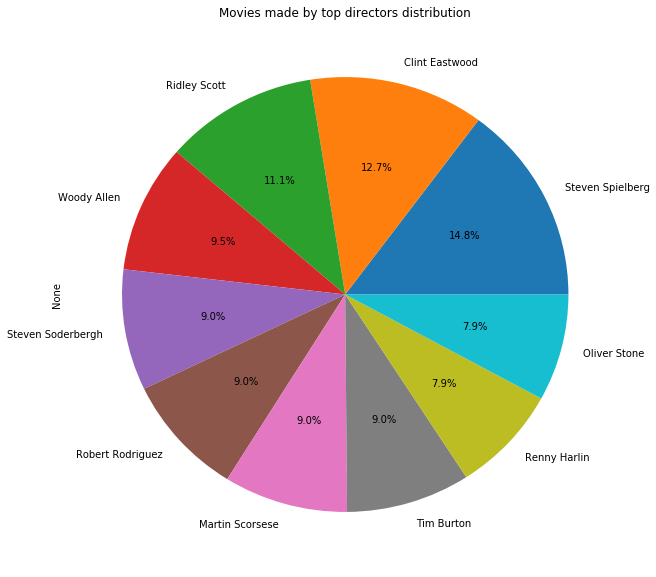

In [30]:
#Director column have multiple values in it.
#splitting them and running double for loop to store each director name individually in a list
#using pd.series to convert list into pandas series
#using value_counts() to see number of time a director name has occured
plt.figure(figsize=(10,10))
director_list=df['director'].str.split('|')
director=[]
for i in director_list:
    for j in i:
        director.append(j)
df_director=pd.Series(director)
print(df_director.value_counts().head())
#plotting pie chart for top 10 directors to see the proportions
#autocpt paramter helps in displaying percentage of a portion
df_director.value_counts()[:10].plot(kind='pie',autopct = '%1.1f%%');
plt.title('Movies made by top directors distribution')

* Steven Spielberg made most movies with a total count of 28.
* Steven Spielberg,Clint Eastwood and Ridley Scott are the only who have made over 20 movies till now.

### 13. Which Actor or Actress has worked in the most movies?

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64


Text(0.5,0,'Name of actor')

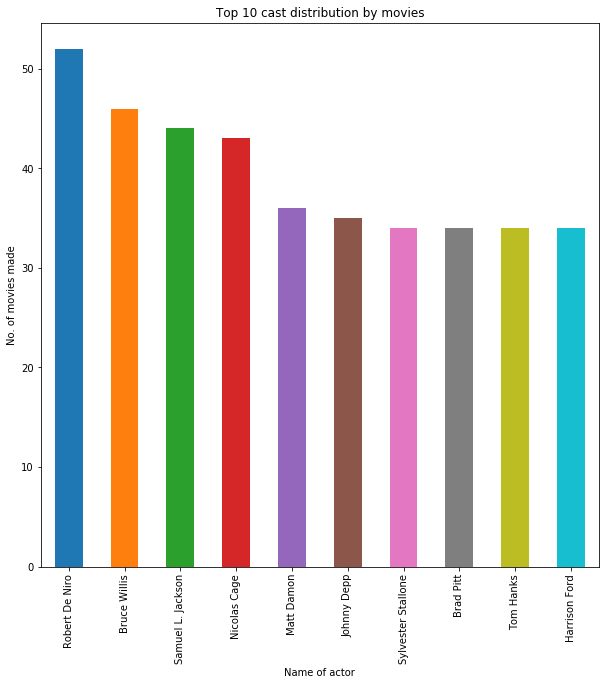

In [31]:
#cast column also have multiple names in it
#str.split the value of column and dobule for loop to store separate all the cast name storing it in a list
plt.figure(figsize=(10,10))
cast_list=df['cast'].str.split('|')
cast=[]
for i in cast_list:
    for j in i:
        cast.append(j)
df_cast=pd.Series(cast)
print(df_cast.value_counts()[:5])
#plot for visualisation of top 10 actor or actresses
df_cast.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 cast distribution by movies')
plt.ylabel('No. of movies made')
plt.xlabel('Name of actor')

* Robert De Niro has worked in most with a total count of 52 and probably the only actor who has done over 50 movies.
* Robert De Niro,Bruce Willis,Samuel L. Jackson and Nicolas Cage have done over 40 movies

### 14. Which production comapnies has made most movies?

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64


Text(0.5,0,'Name of company')

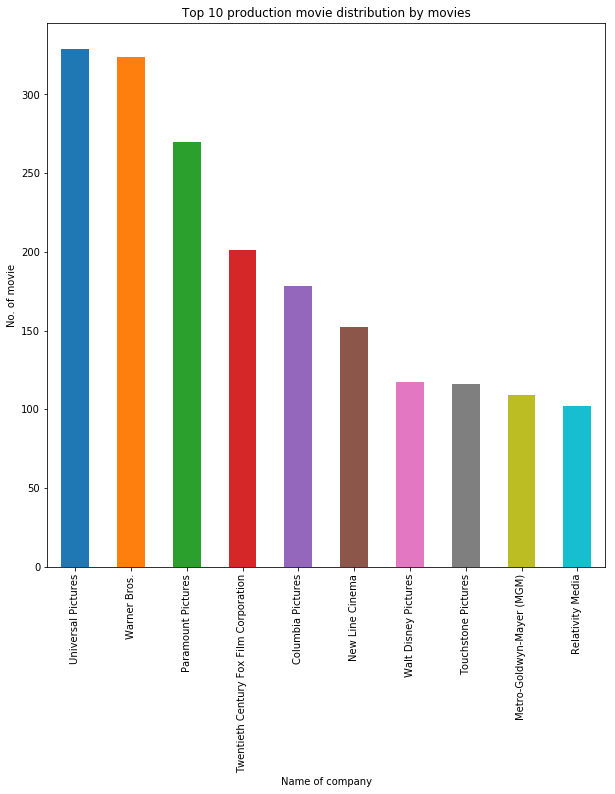

In [32]:
plt.figure(figsize=(10,10))
production_companies_list=df['production_companies'].str.split('|')
production_companies=[]
for i in production_companies_list:
    for j in i:
        production_companies.append(j)
df_production_companies=pd.Series(production_companies)
print(df_production_companies.value_counts()[:5])
df_production_companies.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 production movie distribution by movies')
plt.ylabel('No. of movie')
plt.xlabel('Name of company')

* In the past years Universal Pictures has made the most movies with a total count of 329.
* Warner Bros. missed the top spot by 5 movies which is at 324.

In [33]:
df.describe()

,popularity,budget,revenue,runtime,release_year,net_profit
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,2001.229172,7.136540e+07
std,1.480569,4.232179e+07,1.772976e+08,19.845678,11.329616,1.513764e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,1960.000000,-4.139124e+08
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,1995.000000,-1.173477e+06
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,2004.000000,2.047434e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,2010.000000,8.347333e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000,2.544506e+09


***************
***************


* Till now we have done analysis over the whole movie dataset.
* But now we will do the analysis of those movies which has been a huge hit or whose total profit margin were alot.
* In order to find out which attributes lead to a successful/profitable movie we will have to first specify the criteria over which will consider a movie successful.
* Let say movie which earned over 40M\\$ were successful or huge hit.
> **Let's analyse some attributes which will help us to find some factors behind a succesful movie.**


We will a create a new dataset out of the old dataset which will only contain movies whose profit was 40M\\$

### 15. In which genre most successful movies were made?

Drama              553
Comedy             542
Action             504
Thriller           453
Adventure          402
Romance            244
Family             242
Crime              227
Science Fiction    219
Fantasy            212
Horror             141
Animation          129
Mystery            120
Music               53
War                 49
History             46
Western             16
Documentary          6
dtype: int64


Text(0.5,1,'Movie genre distribution')

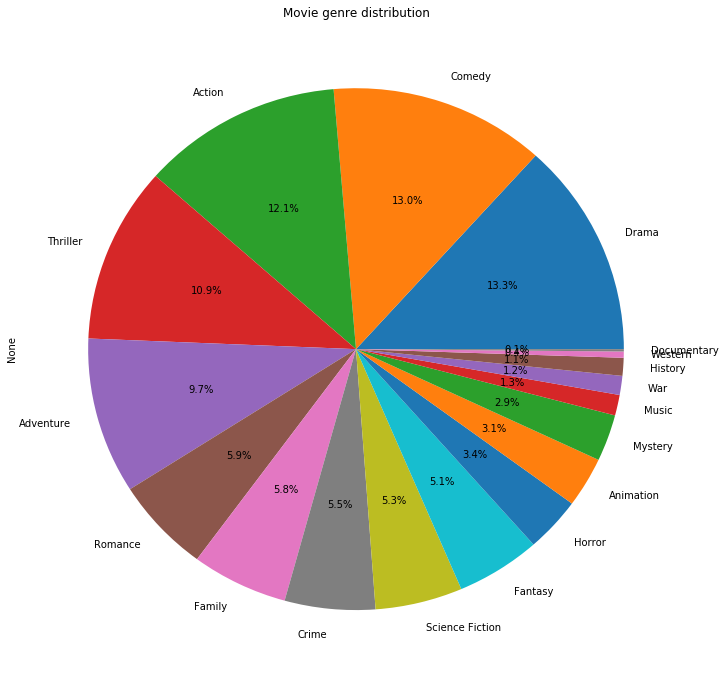

In [34]:
# creating a new dataset where movies profit is over 40M 
# doing str.split and running double for loop as before becuase we have seen there are multiple values present in the columnn
df_blockbuster=df[df['net_profit']>=40000000]
plt.figure(figsize=(12,12))
genre_list_bb=df_blockbuster['genres'].str.split('|')
genre_bb=[]
for i in genre_list_bb:
    for j in i:
        genre_bb.append(j)
df_genre_bb=pd.Series(genre_bb)
print(df_genre_bb.value_counts())
df_genre_bb.value_counts().plot(kind='pie',autopct = '%1.1f%%');
plt.title('Movie genre distribution')

* Drama retains the top spot with a count of  543 when it comes to genre in which the most successful movies were made.
* Drama being at the top might give us a hint that people like to watch Drama genre movies alot or it can be due to the face that this specific genre of movies are produced at the bulk.
* Drama,comedy and action are the only three genres with a count over 500

### 16. Which director has made the most number of successful movies?

In [35]:
# Doing as we did for the given dataset
director_list_bb=df_blockbuster['director'].str.split('|')
director_bb=[]
for i in director_list_bb:
    for j in i:
        director_bb.append(j)
df_director_bb=pd.Series(director_bb)
df_director_bb.value_counts().head()

Steven Spielberg    24
Clint Eastwood      15
Robert Zemeckis     13
Ridley Scott        12
Tim Burton          12
dtype: int64

* Steven Spielberg is not only the director with most number of movie produced but also the director with most successful movies ever produced.
* Steven Spielberg has count of 24 with no other director near him.But Robert Zemeckis, Clint Eastwood, Tim Burton etc. prove to be really great directors

### 17. Which actor had produced more number of successful movies?

In [36]:
cast_list_bb=df_blockbuster['cast'].str.split('|')
cast_bb=[]
for i in cast_list_bb:
    for j in i:
        cast_bb.append(j)
df_cast_bb=pd.Series(cast_bb)
df_cast_bb.value_counts().head()

Tom Cruise            27
Tom Hanks             26
Brad Pitt             25
Cameron Diaz          22
Sylvester Stallone    21
dtype: int64

* The results looks completely different than what we got while doing analysis without any constraint.
* This time Tom cruise take the top spot for making most successful and Robert De Niro comes at 5th inspite making most number of movies.
* No top actor of regular analysis comes in top 5 spot except Robert De Niro so from this we can say that its not necessary that acotr/actress who acted in more number of movies whill have more hits.

### 18. Which production companie has made the more number of successful movies?

In [37]:
production_companies_list_bb=df_blockbuster['production_companies'].str.split('|')
production_companies_bb=[]
for i in production_companies_list_bb:
    for j in i:
        production_companies_bb.append(j)
df_production_companies_bb=pd.Series(production_companies_bb)
df_production_companies_bb.value_counts().head()

Universal Pictures                        171
Warner Bros.                              162
Paramount Pictures                        141
Twentieth Century Fox Film Corporation    126
Columbia Pictures                         103
dtype: int64

* The list remains the same as the last time which makes Universal pictures undoubtedly the best production company till as they made most number successsful movies and most movies.

### 19. What is the average runtime of successful movies and its distribution?

Text(0.5,1,'Runtime of high revenue Movies(in min)')

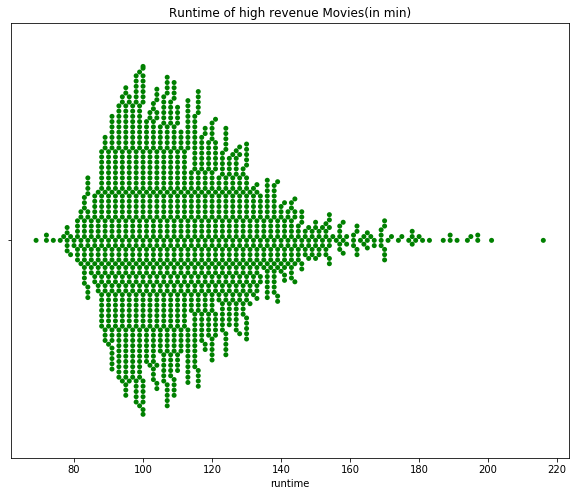

In [38]:
plt.figure(figsize=(10,8))
#swarmplot for categorical scatterplot with non-overlapping points.
#https://seaborn.pydata.org/generated/seaborn.swarmplot.html
sns.swarmplot(df_blockbuster['runtime'], color = 'green');
plt.title('Runtime of high revenue Movies(in min)')

Text(0.5,1,'Boxplot for high revenue movie by runtime(in min)')

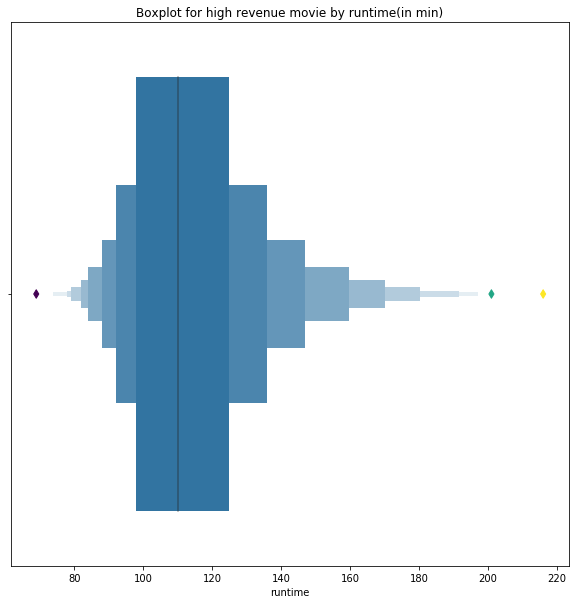

In [39]:
plt.figure(figsize=(10,10))
sns.boxenplot(df_blockbuster['runtime']);
plt.title('Boxplot for high revenue movie by runtime(in min)')

* Most successful movies were made with a runtime of 110-120 minutes
* Mean of runtime in this case is 113 minutes.
* From the above plots we can say that general audience dont movies of runtime more 140 minutes and less 90 minutes.

### 20. What are some descriptive statistic regarding high revenue or successful movies?

In [40]:
df_blockbuster.describe()

,popularity,budget,revenue,runtime,release_year,net_profit
count,1492.000000,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1.492000e+03
mean,1.926854,5.734119e+07,2.364138e+08,113.149464,2002.238606,1.790726e+08
std,2.023631,5.138134e+07,2.285279e+08,20.624841,10.823226,1.965442e+08
min,0.131526,1.130000e+02,4.266441e+07,69.000000,1960.000000,4.000000e+07
25%,0.915478,2.000000e+07,1.012059e+08,98.000000,1997.000000,6.570276e+07
50%,1.388100,4.000000e+07,1.594733e+08,110.000000,2005.000000,1.104662e+08
75%,2.227269,8.000000e+07,2.865030e+08,125.000000,2011.000000,2.069620e+08
max,32.985763,3.800000e+08,2.781506e+09,216.000000,2015.000000,2.544506e+09


* Average budget of high revenue or successful movie is about 57.3M\\$ while there average revenue tends to go around 236M\\$ which is good profit margin.
* Speaking of profit earning successful movie usually earns around 179M\\$
* Movie with highest profit ever is 2.54B\\$ which definetly avatar as we have seen before
* The runtime of movie averages around 113 minutes

<a id='conclusions'></a>
## Conclusion

Inferences that we can make from this dataset are:
> * The Warrior's Way,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: At World's End and Avengers: Age of Ultron are some of the expensive movies ever made
* Drama is the genre on which most movie has been ever released followed by action, comedy and thriller.
* Avatar has been the most succesful movie ever on the box office in terms of revenue and shattered has been the worst.
* Avatar,Star Wars: The Force Awakens,Titanic and Jurassic world are the ones who had made the most profit on the box-office.
* Runtime of the movies has been dropped alot since the 60s and now average runtime is around 110-120 minutes.But the fascinating thing is movies which lasts around 160-200 minutes are the ones which has been liked more by the audience(based on popularity).
* Steven Spielberg,Clint Eastwood and ridley scott have directed most number of movies.
   
In orders to make a high revenue or successful movie:
> * Choose Drama,action, comedy or thriller as their movie genre.
* Should keep the runtime around 110-120 minutes.
* Production house should be Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation or Columbia Pictures.
* Should keep Tom Cruise,Tom Hanks ,Brad Pitt,Cameron Diaz or Robert De Niro as their lead role.
* One should speend around 57.3M\\$ as budget for the movie
    

## Constraints
* Above analysis and calculations were done by keeping a profit margin of 40M\\$,so we cannnot say that this conclusion is completly accurate.But there are high chances of movie doing well if the above conditions are followed.We have clearly seen that movies invloving some specific actors,directors and of a particular genre will attract more general audience and thus leading to a higher chance of beind a hit.
* While doing the data cleaning thousands of rows were dropped due to NAN value problem.So it's no accurate analysis as there are chances of key data being lost.
* The dataset has really limited number of factors which influence a making of movie such as co-producer,song writer,country,language in which it was released,writers etc. so we cannot completly vouch for this analysis.
